## Metody Nieparametryczne w Statystyce
# Zadanie 13
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej w teście Kołmogorowa-Smirnowa w przypadku, gdy rozważane próbki pochodzą z tego samego rozkładu. Rozważyć dwa różne rozkłady asymetryczne. W badaniu uwzględnić różną liczebność próbek.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [14]:
import numpy as np, pandas as pd
from scipy.stats import kstest, laplace_asymmetric, skewnorm
from tqdm import tqdm
import matplotlib.pyplot as plt

# wyciszenie ostrzeżeń dla testu kolmogorova-smirnova
import warnings
warnings.filterwarnings('ignore')

2. Badanie odsetków odrzuceń prawdziwej hipotezy głównej w teście Kołmogorova-Smirnova gdy rozważane próbki pochodzą z rozkładów asymetrycznych: asymetrycznego rozkładu Laplace'a oraz rozkładu normalnego skośnego.

Kappa jest parametrem skośności zarówno w rozkładzie laplace'a jak i w rozkładzie normalnym. W przypadku rozkładu normalnego pozostałe parametry wynoszą mu=0 i sigma=1.

Test dla rozkładu  asymetrycznego Laplace'a


100%|██████████| 140/140 [00:25<00:00,  5.59it/s]


Test dla rozkładu  skośnego normalnego


100%|██████████| 140/140 [00:24<00:00,  5.66it/s]


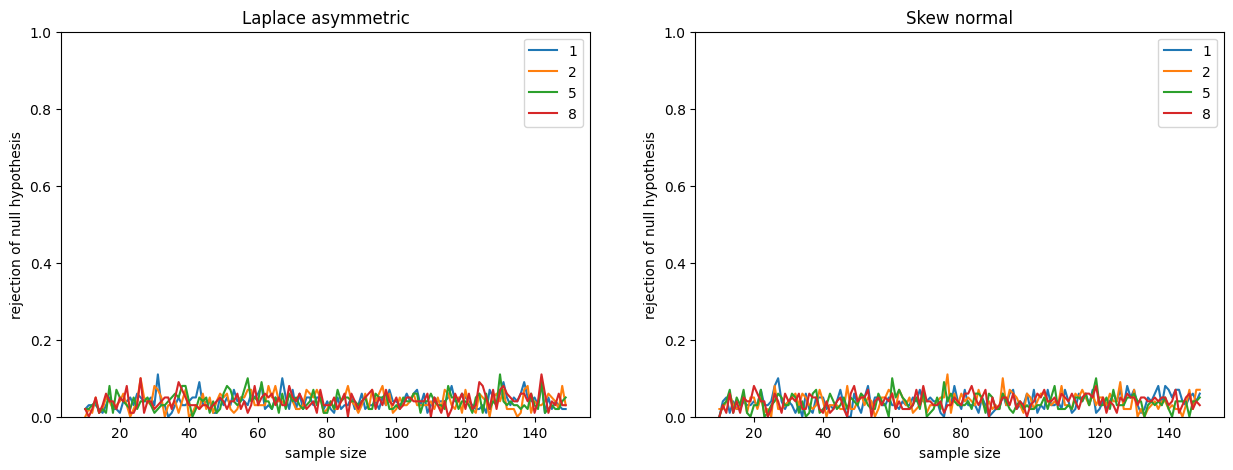

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for k in range(0, 2):    
    results = pd.DataFrame(columns=["1", "2", "5", "8"])
    buf = []
    print("Test dla rozkładu ", "asymetrycznego Laplace'a" if k == 0 else "skośnego normalnego")
    for n in tqdm(range (10, 150)):
        for i in range (0, 100):
            # kappa - parametr kształtu rozkładu (skośności)
            for kappa in [1, 5, 8, 30]:
                #generowanie dwóch wektorów liczbowych o asymetrycznym rozkładzie
                if k == 0:
                    x1 = laplace_asymmetric.rvs(kappa, size=n)
                    x2 = laplace_asymmetric.rvs(kappa, size=n)
                else:
                    x1 = skewnorm.rvs(kappa, size=n)
                    x2 = skewnorm.rvs(kappa, size=n)
                
                #test kolmogorova-smirnova dla obu wektorów liczbowych
                buf.append(kstest(x1, x2)[1] < .05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(title="Laplace asymmetric" if k == 0 else "Skew normal", ax = axes[k],
                xlabel="sample size", ylabel="rejection of null hypothesis", ylim=[0, 1])

Jak można zauważyć, odsetek odrzuceń hipotezy głównej oscyluje wokół ustalonego poziomu istotności. Oznacza to, że test ma wysoką moc, i nie zależy ona znacząco od wielkości próbki ani od parametrów rozkładu.